In [1]:
import sys
from sklearn import svm
import adversaries as ad
from data_reader import input, output, operations
from classifier import Classifier
from metrics import EvasionMetrics
from copy import deepcopy

#-----------------------------Library Demo---------------------------------
# Demonstrate framework testing by simulating an SVM classifier and its  
# resulting classification accuracy after an attack from the simple_optimize adversary.

# Initial learner training:


In [2]:
# choose a learning model 
learning_model = svm.SVC(probability=True, kernel='linear')

# load the instances to feed to the learner and adversary 
instances = input.load_instances('./data_reader/data/test/100_instance_debug')

# create a naive classifier using classifier and specify the training data 
clf = Classifier(learning_model, instances)

#train the classifier on the data
clf.train()

In [3]:
# choose an adversary attack strategy, here we choose simple_optimize
adv = ad.SimpleOptimize(lambda_val=-100, max_change = 65, learner = clf)

# perform the attack/strategy on the data 
instances_post_attack = adv.attack(instances)


Pre-attack Accuracy (naive classifier): 1.0
Post-attack Accuracy: (naive classifier): 0.821782178218


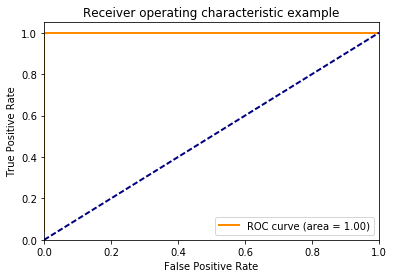

In [4]:
# obtain metrics of classification performance both pre- and post- attack
metrics = EvasionMetrics(clf, instances, instances_post_attack)
preAccuracy = metrics.getAccuracy(True)
postAccuracy = metrics.getAccuracy(False)
print ("Pre-attack Accuracy (naive classifier): " + str(preAccuracy))
print ("Post-attack Accuracy: (naive classifier): " + str(postAccuracy))

# plot ROC curve of naive classifier performance after attack
metrics.plotROC(False)

In [5]:
# Learner responds by exercising a robust strategy when training:
instances2 = input.load_instances('./data_reader/data/test/100_instance_debug')
learning_model2 = svm.SVC(probability=True, kernel='linear')
clf2 = Classifier(learning_model2, instances2, ["svm_restrained", adv.clone()]) 

clf2.train()

ErrorDuringImport: problem in learners.svm_restrained - ModuleNotFoundError: No module named 'cvxpy'

In [ ]:
# Now we launch the attack on the robust classifier 
adv = ad.SimpleOptimize(lambda_val=-100, max_change = 65, learner = clf2)
instances_post_attack2 = adv.attack(instances2)


In [ ]:
# obtain metrics of classification performance both pre- and post- attack
metrics2 = EvasionMetrics(clf2, instances, instances_post_attack2)
preAccuracy2 = metrics2.getAccuracy(True)
postAccuracy2 = metrics2.getAccuracy(False)
print ("Pre-attack Accuracy (robust classifier): " + str(preAccuracy2))
print ("Post-attack Accuracy: (robust classifier): " + str(postAccuracy2))

metrics2.plotROC(True)